# This file use FCN network for image classification

### Some pre-settings

In [1]:
"""
some pre-settings to ensure the functioning of my GPU flatiom
remove if not needed
"""
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


### Build a model which employ FCN head, keep in mind the number of parameters which should be the same as our CNN + FC network.

In [2]:
# model
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation

Using TensorFlow backend.


In [3]:
"""
To make it straightfroward we only use one convlutional layer. multiple layers can be tested as well
"""
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=[28, 28, 1]))
model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Flatten())
# model.add(Dense(10, activation='softmax'))
model.add(Conv2D(10, (13, 13), activation='softmax'))
model.add(Flatten())

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 10)          54090     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


### Data preprocessing 

In [4]:
"""
view the shape of dataset
"""
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train.shape: ', x_train.shape)
print('y_train.shape: ', y_train.shape)
print('x_test.shape: ', x_test.shape)
print('y_test.shape: ', y_test.shape)

x_train.shape:  (60000, 28, 28)
y_train.shape:  (60000,)
x_test.shape:  (10000, 28, 28)
y_test.shape:  (10000,)


In [5]:
"""
uncomment because we use a RTX2060 GPU for training.
If the dataset is too large for your system, for example you use CPU to train, you can sample only part of the data.
And print the sample size
"""
# x_train = x_train[:1000]
# y_train = y_train[:1000]
# x_test  = x_test[:100]
# y_test  = y_test[:100]

# print('After downsampling: ')
# print('x_train.shape: ', x_train.shape)
# print('y_train.shape: ', y_train.shape)
# print('x_test.shape: ', x_test.shape)
# print('y_test.shape: ', y_test.shape)

'\nuncomment because we use a RTX2060 GPU for training.\nIf the dataset is too large for your system, for example you use CPU to train, you can sample only part of the data.\nAnd print the sample size\n'

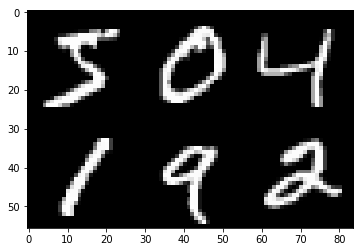

In [6]:
"""
visualize the data
"""
import matplotlib.pyplot as plt
import numpy as np

image1 = np.concatenate((x_train[0], x_train[1], x_train[2]), axis=1)
image2 = np.concatenate((x_train[3], x_train[4], x_train[5]), axis=1)
image = np.concatenate((image1, image2), axis=0)
plt.imshow(image, cmap='gray')
plt.show()

In [7]:
"""
pre-processing and show show the shape of data
"""
print('check the maximum value in the image:', np.max(x_train[0]))
print('check data type:', type(x_train[0,0,0]))

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test  = x_test.reshape((x_test.shape[0], 28, 28, 1))

x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test /= 255

# print('check labels:', y_train[:10])
y_train = keras.utils.to_categorical(y_train, 10)
y_test  = keras.utils.to_categorical(y_test, 10)
# print('check label shape:', y_train.shape)
# print('check labels:', y_train[:10])

check the maximum value in the image: 255
check data type: <class 'numpy.uint8'>


In [8]:
"""
settings for training
"""
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.categorical_crossentropy,
              metrics=[keras.metrics.categorical_accuracy])

call_back_list = [
    keras.callbacks.EarlyStopping(monitor = 'categorical_accuracy',
                                  patience = 1),
    
    keras.callbacks.ModelCheckpoint(filepath='mnist-fc.h5', 
                                    monitor='val_loss', 
                                    save_best_only=True)
                 ]

In [9]:
"""
train a CNN + FC model
"""
history = model.fit(x_train, y_train,
          batch_size=64,
          epochs=500,
          validation_data=(x_test, y_test),
          callbacks=call_back_list)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 5s 91us/step - loss: 0.2733 - categorical_accuracy: 0.9234 - val_loss: 0.1171 - val_categorical_accuracy: 0.9682
Epoch 2/500
60000/60000 [==============================] - 4s 60us/step - loss: 0.0992 - categorical_accuracy: 0.9716 - val_loss: 0.0770 - val_categorical_accuracy: 0.9767
Epoch 3/500
60000/60000 [==============================] - 4s 60us/step - loss: 0.0725 - categorical_accuracy: 0.9792 - val_loss: 0.0659 - val_categorical_accuracy: 0.9795
Epoch 4/500
60000/60000 [==============================] - 4s 59us/step - loss: 0.0610 - categorical_accuracy: 0.9827 - val_loss: 0.0589 - val_categorical_accuracy: 0.9803
Epoch 5/500
60000/60000 [==============================] - 4s 60us/step - loss: 0.0539 - categorical_accuracy: 0.9843 - val_loss: 0.0624

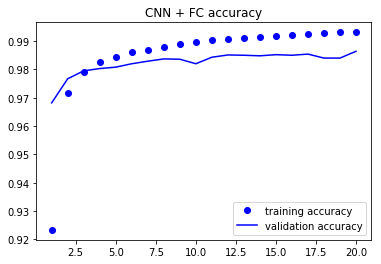

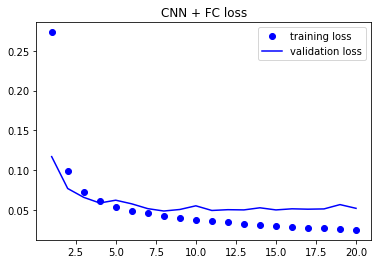

In [10]:
"""
visualize the results
"""
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('CNN + FC accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('CNN + FC loss')
plt.legend()

plt.show()